### Ignore warnings

In [1]:
import warnings
from sklearn.exceptions import ConvergenceWarning

# Add this line to your existing imports
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)

### Basic import

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Classifiers

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

### Optimizer & evaluation

In [4]:
from sklearn.metrics import (accuracy_score, roc_curve, roc_auc_score, confusion_matrix,
                             classification_report, precision_recall_curve, average_precision_score)
from sklearn.model_selection import cross_val_score, RandomizedSearchCV

from sklearn.decomposition import PCA

### Data preprocessing

In [5]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [6]:
pwd = os.getcwd()
print(pwd)

e:\research\HEA_transfer_learning\manuscript\figures


In [7]:
data = pd.read_excel(pwd+"/data/training_data/weighted_features.xlsx")
print("Shape of the dataset is: ", data.shape)

data.head()

Shape of the dataset is:  (111, 102)


,Composition,EquiTibrium conditions,phase_count,PhaseType,binary_1,binary_2,binary_3,binary_4,binary_5,binary_6,...,weighted_form_energy_pa_7,weighted_volume_8,weighted_density_8,weighted_form_energy_pa_8,weighted_volume_9,weighted_density_9,weighted_form_energy_pa_9,weighted_volume_10,weighted_density_10,weighted_form_energy_pa_10
0,Al0.25MoNbTiV,AC,s,BCC,Al-Ti,Al-Mo,Al-Nb,Al-V,Mo-Nb,Mo-V,...,0.004675,1.775342,0.412396,0.005027,1.686080,0.298270,0.006566,3.855443,0.379690,0.038795
1,Al0.5MoNbTiV,AC,S,BCC,Al-Ti,Al-Mo,Al-Nb,Al-V,Mo-Nb,Mo-V,...,0.004170,1.583561,0.367847,0.004484,1.503942,0.266049,0.005857,3.438960,0.338674,0.034604
2,Al0.75MoNbTiV,AC,S,BCC,Al-Ti,Al-Mo,Al-Nb,Al-V,Mo-Nb,Mo-V,...,0.003743,1.421257,0.330146,0.004025,1.349798,0.238781,0.005257,3.086490,0.303962,0.031057
3,Al1.5MoNbTiV,AC,S,BCC,Al-Ti,Al-Mo,Al-Nb,Al-V,Mo-Nb,Mo-V,...,0.002792,1.060070,0.246245,0.003002,1.006771,0.178099,0.003921,2.302114,0.226716,0.023165
4,AlMoNbTiV,AC,s,BCC,Al-Ti,Al-Mo,Al-Nb,Al-V,Mo-Nb,Mo-V,...,0.003378,1.282685,0.297956,0.003632,1.218193,0.215500,0.004744,2.785558,0.274326,0.028029


In [8]:
# Replace lowercase 's' with uppercase 'S'.
data['phase_count'] = data['phase_count'].replace('s', 'S')

In [9]:
X = data.iloc[:, -30:].copy()
#X = X.drop(["volume_6"], axis=1)
feature_names = X.columns
y = data.phase_count.copy()

In [10]:
print(y.unique())

['S' 'M']


In [11]:
scaler = MinMaxScaler()
encoder = LabelEncoder()

In [12]:
X = pd.DataFrame(scaler.fit_transform(X), columns=feature_names)
X.head()

,weighted_volume_1,weighted_density_1,weighted_form_energy_pa_1,weighted_volume_2,weighted_density_2,weighted_form_energy_pa_2,weighted_volume_3,weighted_density_3,weighted_form_energy_pa_3,weighted_volume_4,...,weighted_form_energy_pa_7,weighted_volume_8,weighted_density_8,weighted_form_energy_pa_8,weighted_volume_9,weighted_density_9,weighted_form_energy_pa_9,weighted_volume_10,weighted_density_10,weighted_form_energy_pa_10
0,0.246789,0.029855,0.837661,0.182955,0.072176,0.779161,0.127788,0.110721,0.769998,0.091299,...,0.743470,0.240330,0.548462,0.524178,0.393647,0.496116,0.215829,0.242180,0.434400,0.398977
1,0.450197,0.070041,0.712658,0.356477,0.167540,0.641373,0.235909,0.218515,0.673471,0.230875,...,0.699176,0.202726,0.478521,0.467508,0.343959,0.433124,0.189912,0.211174,0.378784,0.353970
2,0.610471,0.101705,0.614162,0.493203,0.242681,0.532802,0.321103,0.303451,0.597412,0.340854,...,0.661690,0.170902,0.419330,0.419549,0.301907,0.379814,0.167978,0.184933,0.331716,0.315882
3,0.916895,0.162244,0.425852,0.754605,0.386342,0.325230,0.483981,0.465837,0.451999,0.551118,...,0.578269,0.100081,0.287609,0.312821,0.208327,0.261180,0.119168,0.126538,0.226973,0.231120
4,0.737178,0.126738,0.536295,0.601293,0.302085,0.446971,0.388453,0.370598,0.537284,0.427799,...,0.629684,0.143731,0.368794,0.378602,0.266005,0.334299,0.149252,0.162529,0.291530,0.283362


In [13]:
X.columns

Index(['weighted_volume_1', 'weighted_density_1', 'weighted_form_energy_pa_1',
       'weighted_volume_2', 'weighted_density_2', 'weighted_form_energy_pa_2',
       'weighted_volume_3', 'weighted_density_3', 'weighted_form_energy_pa_3',
       'weighted_volume_4', 'weighted_density_4', 'weighted_form_energy_pa_4',
       'weighted_volume_5', 'weighted_density_5', 'weighted_form_energy_pa_5',
       'weighted_volume_6', 'weighted_density_6', 'weighted_form_energy_pa_6',
       'weighted_volume_7', 'weighted_density_7', 'weighted_form_energy_pa_7',
       'weighted_volume_8', 'weighted_density_8', 'weighted_form_energy_pa_8',
       'weighted_volume_9', 'weighted_density_9', 'weighted_form_energy_pa_9',
       'weighted_volume_10', 'weighted_density_10',
       'weighted_form_energy_pa_10'],
      dtype='object')

In [14]:
y = pd.Series(encoder.fit_transform(y), name='phase_count')
y

0      1
1      1
2      1
3      1
4      1
      ..
106    0
107    0
108    0
109    1
110    1
Name: phase_count, Length: 111, dtype: int32

In [15]:
encoder.inverse_transform([0,1])

array(['M', 'S'], dtype=object)

In [16]:
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

np.unique(y_smote, return_counts=True), np.unique(y, return_counts=True)

((array([0, 1]), array([74, 74], dtype=int64)),
 (array([0, 1]), array([37, 74], dtype=int64)))

In [17]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.33, random_state=42)

In [18]:
np.unique(y_test, return_counts=True), np.unique(y_train, return_counts=True), np.unique(y_smote, return_counts=True)

((array([0, 1]), array([13, 17], dtype=int64)),
 (array([0, 1]), array([61, 57], dtype=int64)),
 (array([0, 1]), array([74, 74], dtype=int64)))

In [19]:
splits = [X_train, X_test, y_train, y_test]
for splt, name in zip(splits, ["X_train", "X_test", "y_train", "y_test"]):
    print(f"Data split: {name}, Shape: {splt.shape}")

Data split: X_train, Shape: (118, 30)
Data split: X_test, Shape: (30, 30)
Data split: y_train, Shape: (118,)
Data split: y_test, Shape: (30,)


In [20]:
split_dict = {"X_train": X_train, "X_test": X_test, "y_train": y_train, "y_test": y_test}
for name, split in split_dict.items():
    print(f"Data split: {name}, Shape: {split.shape}")

Data split: X_train, Shape: (118, 30)
Data split: X_test, Shape: (30, 30)
Data split: y_train, Shape: (118,)
Data split: y_test, Shape: (30,)


In [21]:
classifiers = {
    "KNeighborsClassifier": {
        "model": KNeighborsClassifier(),
        "params": {
            "n_neighbors": list(range(1, 31)),
            "weights": ["uniform", "distance"],
            "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
            "leaf_size": list(range(20, 41)),
            "p": [1, 2]
        }
    },
    "DecisionTreeClassifier": {
        "model": DecisionTreeClassifier(),
        "params": {
            "criterion": ["gini", "entropy"],
            "splitter": ["best", "random"],
            "max_depth": [None] + list(range(2, 21)),
            "min_samples_split": range(2, 21),
            "min_samples_leaf": range(1, 21),
            "max_features": [None, "sqrt", "log2"],
        }
    },
    "RandomForestClassifier": {
        "model": RandomForestClassifier(),
        "params": {
            "n_estimators": list(range(50, 301, 50)),
            "criterion": ["gini", "entropy"],
            "max_depth": [None] + list(range(2, 21)),
            "min_samples_split": range(2, 21),
            "min_samples_leaf": range(1, 21),
            "max_features": [None, "auto", "sqrt", "log2"],
        }
    },
    "SVC": {
        "model": SVC(),
        "params": {
            "C": [0.1, 1, 10, 100],
            "kernel": ["linear", "poly", "rbf", "sigmoid"],
            "degree": list(range(2, 6)),
            "gamma": ["scale", "auto"] + list(np.logspace(-4, 1, 6)),
            "coef0": list(np.linspace(-1, 1, 21)),
            "shrinking": [True, False],
            "probability": [True]
        }
    },
    "GaussianNB": {
        "model": GaussianNB(),
        "params": {
            "var_smoothing": list(np.logspace(-12, -3, 10))
        }
    },
    "XGBClassifier": {
        "model": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
        "params": {
            "n_estimators": list(range(50, 301, 50)),
            "learning_rate": [0.01, 0.05, 0.1, 0.2, 0.3],
            "max_depth": list(range(2, 21)),
            "min_child_weight": list(range(1, 11)),
            "gamma": list(np.linspace(0, 1, 11)),
            "subsample": list(np.linspace(0.1, 1, 10)),
            "colsample_bytree": list(np.linspace(0.1, 1, 10)),
            "scale_pos_weight": [1, 2, 3, 4, 5],
            "reg_alpha": list(np.logspace(-5, 2, 8)),
            "reg_lambda": list(np.logspace(-5, 2, 8))
        }
    },
    "GradientBoostingClassifier": {
        "model": GradientBoostingClassifier(),
        "params": {
            "n_estimators": list(range(50, 301, 50)),
            "learning_rate": [0.01, 0.05, 0.1, 0.2, 0.3],
            "max_depth": list(range(2, 21)),
            "min_samples_split": range(2, 21),
            "min_samples_leaf": range(1, 21),
            "max_features": [None, "sqrt", "log2"],
            "subsample": list(np.linspace(0.1, 1, 10))
        }
    }
}

In [22]:
best_classifiers = {}
best_params = {}

# Initialize the hyper_param_tuning_results dataframe
hyper_param_tuning_results = pd.DataFrame(columns=["Classifier", "Best CV score", "Accuracy on test set"])

# Perform RandomizedSearchCV for each classifier
for classifier_name, classifier_details in classifiers.items():
    model = classifier_details["model"]
    params = classifier_details["params"]

    rscv = RandomizedSearchCV(
        model, params, n_iter=5000, n_jobs=-1, cv=5, verbose=1, random_state=42
    )
    rscv.fit(X_train, y_train)

    best_model = rscv.best_estimator_
    best_classifiers[classifier_name] = best_model
    best_params[classifier_name] = rscv.best_params_
    
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{classifier_name}:")
    print(f"Best CV score: {rscv.best_score_}")
    print(f"Accuracy on test set: {accuracy}")
    print(f"Best parameters: {rscv.best_params_}")
    print("-" * 100)
    
    # Append the results to the hyper_param_tuning_results dataframe
    result = pd.DataFrame(
        {"Classifier": [classifier_name],
         "Best CV score": [rscv.best_score_],
         "Accuracy on test set": [accuracy]
         }
    )
    hyper_param_tuning_results = pd.concat([hyper_param_tuning_results, result], ignore_index=True)

# Print the hyper_param_tuning_results dataframe
hyper_param_tuning_results

Fitting 5 folds for each of 5000 candidates, totalling 25000 fits
KNeighborsClassifier:
Best CV score: 0.8905797101449275
Accuracy on test set: 0.9
Best parameters: {'weights': 'distance', 'p': 1, 'n_neighbors': 1, 'leaf_size': 22, 'algorithm': 'kd_tree'}
----------------------------------------------------------------------------------------------------
Fitting 5 folds for each of 5000 candidates, totalling 25000 fits
DecisionTreeClassifier:
Best CV score: 0.8652173913043478
Accuracy on test set: 0.8333333333333334
Best parameters: {'splitter': 'random', 'min_samples_split': 11, 'min_samples_leaf': 3, 'max_features': None, 'max_depth': 10, 'criterion': 'entropy'}
----------------------------------------------------------------------------------------------------
Fitting 5 folds for each of 5000 candidates, totalling 25000 fits
RandomForestClassifier:
Best CV score: 0.8815217391304347
Accuracy on test set: 0.9
Best parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_

,Classifier,Best CV score,Accuracy on test set
0,KNeighborsClassifier,0.890580,0.900000
1,DecisionTreeClassifier,0.865217,0.833333
2,RandomForestClassifier,0.881522,0.900000
3,SVC,0.898551,0.833333
4,GaussianNB,0.754348,0.633333
5,XGBClassifier,0.898551,0.933333
6,GradientBoostingClassifier,0.907246,0.933333


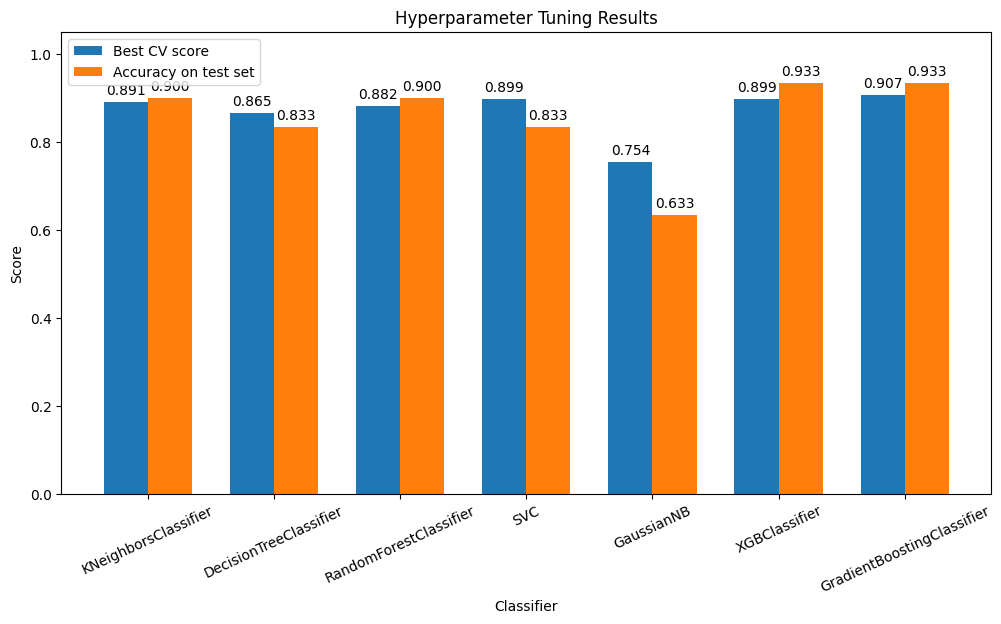

In [23]:
# Set figure size and create subplot
plt.style.use('default')
fig, ax = plt.subplots(figsize=(12, 6))

# Define bar width and positions
width = 0.35
x = hyper_param_tuning_results.index

# Plot bars
rects1 = ax.bar(x - width/2, hyper_param_tuning_results["Best CV score"], width, label="Best CV score")
rects2 = ax.bar(x + width/2, hyper_param_tuning_results["Accuracy on test set"], width, label="Accuracy on test set")

# Set x-axis labels and title
ax.set_xticks(x)
ax.set_xticklabels(hyper_param_tuning_results["Classifier"], rotation=25)
ax.set_xlabel("Classifier")
ax.set_ylabel("Score")
ax.set_title("Hyperparameter Tuning Results")

# Add value labels to bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(
            f"{height:.3f}",
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(0, 3),
            textcoords="offset points",
            ha="center",
            va="bottom",
        )

autolabel(rects1)
autolabel(rects2)

# Set y-axis limit
ax.set_ylim([0, 1.05])

# Add legend
ax.legend()

#plt.savefig(pwd + '/results/feature_importance/with_vol_6/hyper_param_result_with_vol_6.png', dpi=1000, bbox_inches="tight")
# Show plot
plt.show()

In [24]:
# Create an empty DataFrame to store the cross-validation results
cross_val_results = pd.DataFrame(columns=["Classifier", "Mean Accuracy", "95% Confidence Interval"])

# Perform 5-fold cross-validation using best classifiers and their parameters
for classifier_name, classifier in best_classifiers.items():
    print(f"Performing 5-fold cross-validation for {classifier_name}:")
    clf = classifier.set_params(**best_params[classifier_name])
    scores = cross_val_score(clf, X_train, y_train, cv=5)
    mean_accuracy = scores.mean()
    ci_95 = scores.std() * 2
    print(f"Accuracy: {mean_accuracy} (+/- {ci_95})")
    print("-" * 50)

    # Append the results to the DataFrame using pandas.concat
    result = pd.DataFrame(
        {
            "Classifier": [classifier_name],
            "Mean Accuracy": [mean_accuracy],
            "95% Confidence Interval": [ci_95],
        }
    )
    cross_val_results = pd.concat([cross_val_results, result], ignore_index=True)

# Display the cross_val_results DataFrame
cross_val_results

Performing 5-fold cross-validation for KNeighborsClassifier:
Accuracy: 0.8905797101449275 (+/- 0.11157067322048994)
--------------------------------------------------
Performing 5-fold cross-validation for DecisionTreeClassifier:
Accuracy: 0.7130434782608696 (+/- 0.1644400732855693)
--------------------------------------------------
Performing 5-fold cross-validation for RandomForestClassifier:
Accuracy: 0.8565217391304347 (+/- 0.08222003664278466)
--------------------------------------------------
Performing 5-fold cross-validation for SVC:
Accuracy: 0.898550724637681 (+/- 0.06716105281584644)
--------------------------------------------------
Performing 5-fold cross-validation for GaussianNB:
Accuracy: 0.7543478260869565 (+/- 0.12349918173453187)
--------------------------------------------------
Performing 5-fold cross-validation for XGBClassifier:
Accuracy: 0.898550724637681 (+/- 0.06529785696271768)
--------------------------------------------------
Performing 5-fold cross-validat

,Classifier,Mean Accuracy,95% Confidence Interval
0,KNeighborsClassifier,0.890580,0.111571
1,DecisionTreeClassifier,0.713043,0.164440
2,RandomForestClassifier,0.856522,0.082220
3,SVC,0.898551,0.067161
4,GaussianNB,0.754348,0.123499
5,XGBClassifier,0.898551,0.065298
6,GradientBoostingClassifier,0.890217,0.037275


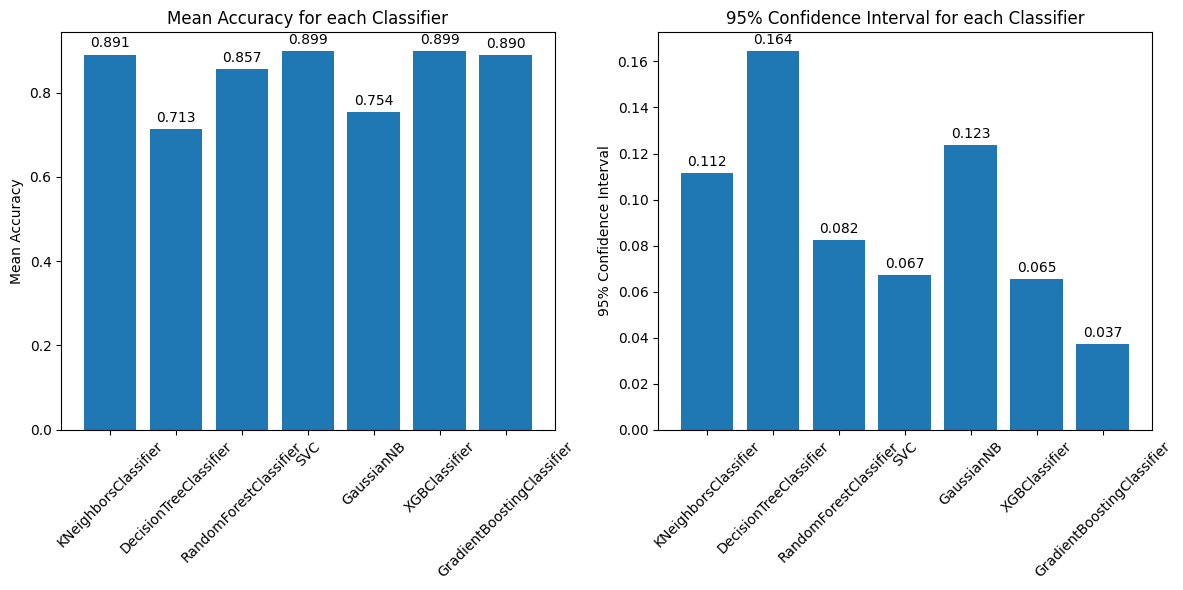

In [25]:
def add_labels(ax, rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.3f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Create a subplot with 1 row and 2 columns
plt.style.use('default')
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Create an array with the position of each bar along the x-axis
x = np.arange(len(cross_val_results))

# Bar plot for Mean Accuracy
rects1 = axes[0].bar(x, cross_val_results["Mean Accuracy"])
axes[0].set_xticks(x)
axes[0].set_xticklabels(cross_val_results["Classifier"], rotation=45)
axes[0].set_ylabel("Mean Accuracy")
axes[0].set_title("Mean Accuracy for each Classifier")
add_labels(axes[0], rects1)

# Bar plot for 95% Confidence Interval
rects2 = axes[1].bar(x, cross_val_results["95% Confidence Interval"])
axes[1].set_xticks(x)
axes[1].set_xticklabels(cross_val_results["Classifier"], rotation=45)
axes[1].set_ylabel("95% Confidence Interval")
axes[1].set_title("95% Confidence Interval for each Classifier")
add_labels(axes[1], rects2)

# Adjust the layout and show the plot
plt.tight_layout()
#plt.savefig(pwd + '/results/feature_importance/with_vol_6/cross_val_result_with_vol_6.png', dpi=1000, bbox_inches="tight")
plt.show()

#### RF Feature importance

In [26]:
rf_tuned_params = {
    'n_estimators': 250, 
    'min_samples_split': 10,
    'min_samples_leaf': 2, 
    'max_features': None, 
    'max_depth': 5, 
    'criterion': 'gini',
}

rf = RandomForestClassifier(**rf_tuned_params)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_pred_train = rf.predict(X_train)

print(f"Accuracy on the training data: {accuracy_score(y_train, y_pred_train):.2f}")
print(f"Accuracy on the test data: {accuracy_score(y_test, y_pred):.2f}")

Accuracy on the training data: 0.94
Accuracy on the test data: 0.90


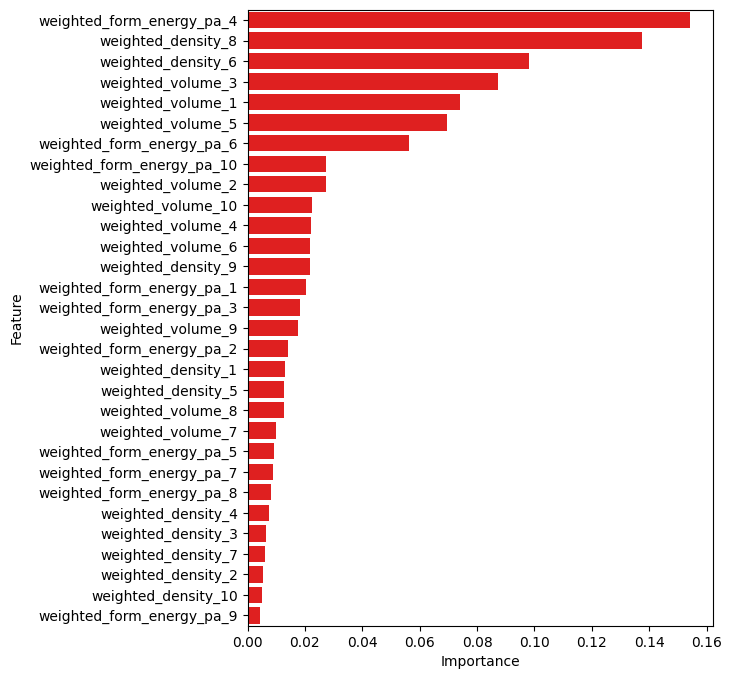

In [27]:
feature_importance_df = pd.DataFrame()
feature_importance_df["Feature"] = X_train.columns
feature_importance_df["Importance"] = rf.feature_importances_

feature_importance_df  = feature_importance_df.sort_values('Importance', ascending=False).reset_index()
plt.style.use('default')
plt.figure(figsize=(6,8))
ax = sns.barplot(x ='Importance', y ='Feature', data= feature_importance_df, color='red')
#plt.savefig(pwd + '/results/feature_importance/with_vol_6/feature_importance_with_vol_6.png', dpi=1000, bbox_inches="tight")
plt.show()

In [28]:
np.sum(feature_importance_df.Importance[:5])

0.5511259329047775

In [29]:
feature_importance_df

,index,Feature,Importance
0,11,weighted_form_energy_pa_4,0.154360
1,22,weighted_density_8,0.137434
2,16,weighted_density_6,0.098167
3,6,weighted_volume_3,0.087130
4,0,weighted_volume_1,0.074036
5,12,weighted_volume_5,0.069494
6,17,weighted_form_energy_pa_6,0.056392
7,29,weighted_form_energy_pa_10,0.027498
8,3,weighted_volume_2,0.027385
9,27,weighted_volume_10,0.022455


#### SVC Feature importance

In [30]:
svc_params = {
    'shrinking': False, 
    'probability': True, 
    'kernel': 'linear', 
    'gamma': 10.0, 
    'degree': 3, 
    'coef0': -0.7, 
    'C': 1
}

# Fit the best SVM model with linear kernel
svc = SVC(**svc_params)
svc.fit(X_train, y_train)

# Calculate feature importances using the coefficients of the support vectors
svc_coef = np.abs(svc.coef_.reshape(-1))
svc_feature_importances = svc_coef / svc_coef.sum()

In [31]:
svc_feature_importances

array([0.01339966, 0.05022056, 0.03064015, 0.00980955, 0.01049016,
       0.02721186, 0.03290693, 0.02109137, 0.03334326, 0.10376487,
       0.00294967, 0.05125445, 0.01998231, 0.0035393 , 0.01724507,
       0.03365012, 0.12647239, 0.02751749, 0.01007068, 0.01095914,
       0.00448292, 0.04730748, 0.11129448, 0.0377905 , 0.00830494,
       0.001582  , 0.01348368, 0.03654946, 0.04203921, 0.06064632])

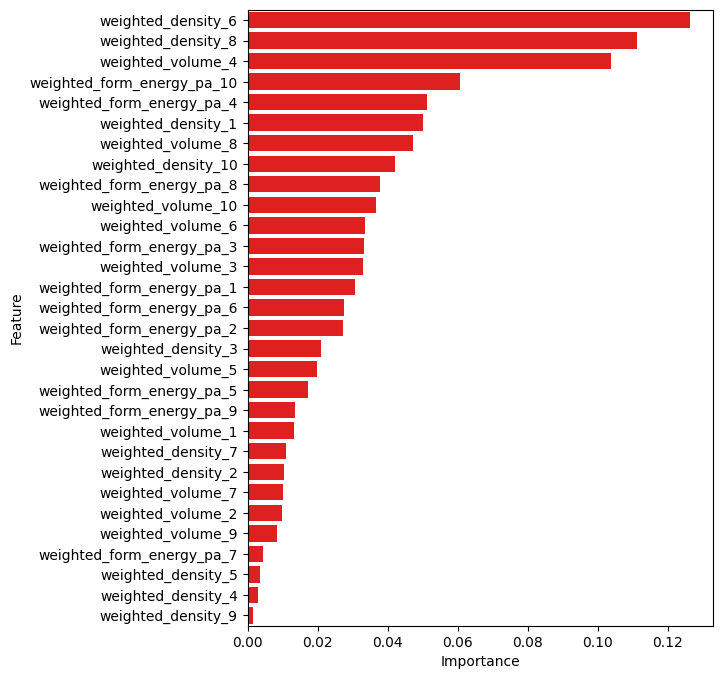

In [32]:
svc_feature_importance_df = pd.DataFrame()
svc_feature_importance_df["Feature"] = X_train.columns
svc_feature_importance_df["Importance"] = svc_feature_importances

svc_feature_importance_df  = svc_feature_importance_df.sort_values('Importance', ascending=False).reset_index()
plt.style.use('default')
plt.figure(figsize=(6,8))
ax = sns.barplot(x ='Importance', y ='Feature', data= svc_feature_importance_df, color='red')
#plt.savefig(pwd + '/results/feature_importance/without_vol_6/svc_feature_importance_without_vol_6.png', dpi=1000, bbox_inches="tight")
plt.show()

In [33]:
y_pred_svc = svc.predict(X_test)
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.65      0.85      0.73        13
           1       0.85      0.65      0.73        17

    accuracy                           0.73        30
   macro avg       0.75      0.75      0.73        30
weighted avg       0.76      0.73      0.73        30



### KNN feature importance

In [34]:
knn_params = {'weights': 'distance', 
              'p': 2, 'n_neighbors': 8, 
              'leaf_size': 21, 
              'algorithm': 'kd_tree'}

knn = KNeighborsClassifier(**knn_params)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=21, n_neighbors=8,
                     weights='distance')

In [35]:
y_pred_knn = knn.predict(X_test)
print(accuracy_score(y_test, y_pred_knn))

0.8


#### Calculating accuracy for diffrent phase counts using KNN

In [36]:
df = data.copy()

In [37]:
def count_phases(phase_string):
    count = phase_string.count('+')
    
    if count == 0:
        if phase_string.startswith('2'):
            return 'double'
        elif phase_string.startswith('3'):
            return 'triple'
        elif phase_string.startswith('4'):
            return 'quadruple'
        else:
            return 'single'
    elif count == 1:
        return 'double'
    elif count == 2:
        return 'triple'

df['PhaseCount'] = df['PhaseType'].apply(count_phases)


df.head()

,Composition,EquiTibrium conditions,phase_count,PhaseType,binary_1,binary_2,binary_3,binary_4,binary_5,binary_6,...,weighted_volume_8,weighted_density_8,weighted_form_energy_pa_8,weighted_volume_9,weighted_density_9,weighted_form_energy_pa_9,weighted_volume_10,weighted_density_10,weighted_form_energy_pa_10,PhaseCount
0,Al0.25MoNbTiV,AC,S,BCC,Al-Ti,Al-Mo,Al-Nb,Al-V,Mo-Nb,Mo-V,...,1.775342,0.412396,0.005027,1.686080,0.298270,0.006566,3.855443,0.379690,0.038795,single
1,Al0.5MoNbTiV,AC,S,BCC,Al-Ti,Al-Mo,Al-Nb,Al-V,Mo-Nb,Mo-V,...,1.583561,0.367847,0.004484,1.503942,0.266049,0.005857,3.438960,0.338674,0.034604,single
2,Al0.75MoNbTiV,AC,S,BCC,Al-Ti,Al-Mo,Al-Nb,Al-V,Mo-Nb,Mo-V,...,1.421257,0.330146,0.004025,1.349798,0.238781,0.005257,3.086490,0.303962,0.031057,single
3,Al1.5MoNbTiV,AC,S,BCC,Al-Ti,Al-Mo,Al-Nb,Al-V,Mo-Nb,Mo-V,...,1.060070,0.246245,0.003002,1.006771,0.178099,0.003921,2.302114,0.226716,0.023165,single
4,AlMoNbTiV,AC,S,BCC,Al-Ti,Al-Mo,Al-Nb,Al-V,Mo-Nb,Mo-V,...,1.282685,0.297956,0.003632,1.218193,0.215500,0.004744,2.785558,0.274326,0.028029,single


In [38]:
# Get the position of the 'PhaseType' column
position = df.columns.get_loc('PhaseType')

# Insert the new column right after the 'PhaseType' column
df.insert(position + 1, 'Phase_Count', df['PhaseCount'])

# Drop the original 'PhaseCount' column
df.drop('PhaseCount', axis=1, inplace=True)

df.head()

,Composition,EquiTibrium conditions,phase_count,PhaseType,Phase_Count,binary_1,binary_2,binary_3,binary_4,binary_5,...,weighted_form_energy_pa_7,weighted_volume_8,weighted_density_8,weighted_form_energy_pa_8,weighted_volume_9,weighted_density_9,weighted_form_energy_pa_9,weighted_volume_10,weighted_density_10,weighted_form_energy_pa_10
0,Al0.25MoNbTiV,AC,S,BCC,single,Al-Ti,Al-Mo,Al-Nb,Al-V,Mo-Nb,...,0.004675,1.775342,0.412396,0.005027,1.686080,0.298270,0.006566,3.855443,0.379690,0.038795
1,Al0.5MoNbTiV,AC,S,BCC,single,Al-Ti,Al-Mo,Al-Nb,Al-V,Mo-Nb,...,0.004170,1.583561,0.367847,0.004484,1.503942,0.266049,0.005857,3.438960,0.338674,0.034604
2,Al0.75MoNbTiV,AC,S,BCC,single,Al-Ti,Al-Mo,Al-Nb,Al-V,Mo-Nb,...,0.003743,1.421257,0.330146,0.004025,1.349798,0.238781,0.005257,3.086490,0.303962,0.031057
3,Al1.5MoNbTiV,AC,S,BCC,single,Al-Ti,Al-Mo,Al-Nb,Al-V,Mo-Nb,...,0.002792,1.060070,0.246245,0.003002,1.006771,0.178099,0.003921,2.302114,0.226716,0.023165
4,AlMoNbTiV,AC,S,BCC,single,Al-Ti,Al-Mo,Al-Nb,Al-V,Mo-Nb,...,0.003378,1.282685,0.297956,0.003632,1.218193,0.215500,0.004744,2.785558,0.274326,0.028029


In [39]:
np.unique(df.Phase_Count, return_counts=True)

(array(['double', 'single', 'triple'], dtype=object),
 array([34, 74,  3], dtype=int64))

In [40]:
def accuracy_calculation_for_phase_type(phase_name, model_name, df=df):
    split = df[df["Phase_Count"] == phase_name].copy()
    splitX = split.iloc[:, -30:]
    splitY = split["phase_count"]
    splitY = pd.Series(encoder.fit_transform(splitY), name='phase_count')
    pred = model_name.predict(splitX)
    return print(accuracy_score(splitY, pred))

In [41]:
phases = ['single', 'double', 'triple']

for phase in phases:
    print(("Accuracy on {} is : ").format(phase)), accuracy_calculation_for_phase_type(phase, knn)

Accuracy on single is : 
0.8513513513513513
Accuracy on double is : 
1.0
Accuracy on triple is : 
1.0


#### Random forest

In [42]:
for phase in phases:
    print(("Accuracy on {} is : ").format(phase)), accuracy_calculation_for_phase_type(phase, rf)

Accuracy on single is : 
0.972972972972973
Accuracy on double is : 
1.0
Accuracy on triple is : 
1.0


#### Decision Tree

In [43]:
dt_params = {'splitter': 'best', 
             'min_samples_split': 13, 
             'min_samples_leaf': 3, 
             'max_features': 'sqrt', 
             'max_depth': 19, 
             'criterion': 'entropy'}

dt = DecisionTreeClassifier(**dt_params)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=19, max_features='sqrt',
                       min_samples_leaf=3, min_samples_split=13)

In [44]:
for phase in phases:
    print(("Accuracy on {} is : ").format(phase)), accuracy_calculation_for_phase_type(phase, dt)

Accuracy on single is : 
0.0
Accuracy on double is : 
0.0
Accuracy on triple is : 
0.0


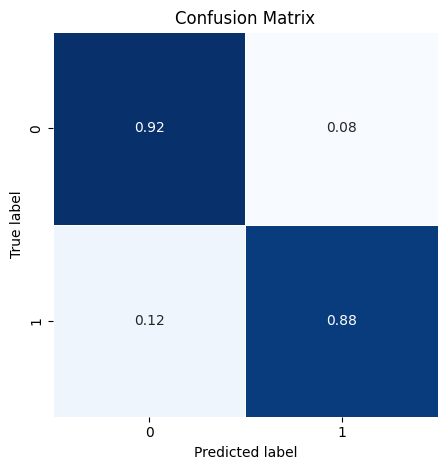

In [45]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define the labels and colors for the chart
labels = ['True Positives', 'False Positives', 'False Negatives', 'True Negatives']
colors = ['green', 'red', 'orange', 'gray']

# Normalize confusion matrix
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create a heatmap of the confusion matrix
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.2f', square=True, linewidths=0.5, cbar=False, ax=ax)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_title('Confusion Matrix')
plt.tight_layout()
plt.show()

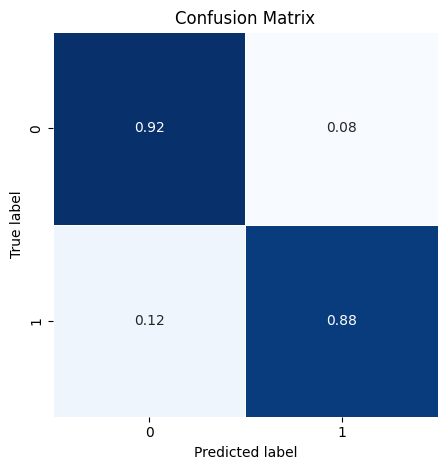

In [46]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define the labels and colors for the chart
labels = ['True Positives', 'False Positives', 'False Negatives', 'True Negatives']
colors = sns.color_palette("Blues", len(labels))

# Normalize confusion matrix
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create a heatmap of the confusion matrix
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.2f', square=True, linewidths=0.5, cbar=False, ax=ax)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [47]:
cm

array([[0.92307692, 0.07692308],
       [0.11764706, 0.88235294]])

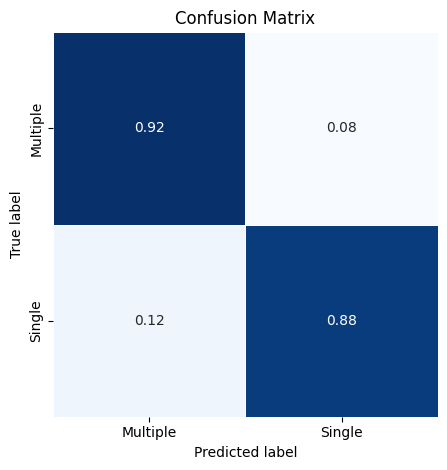

In [48]:
# Replace 0 with 'Multiple' and 1 with 'Single' using a list comprehension
y_test_phase = ['Multiple' if x == 0 else 'Single' for x in y_test]
y_pred_phase = ['Multiple' if x == 0 else 'Single' for x in y_pred]

# Define the labels and colors for the chart
labels = ['True Positives', 'False Positives', 'False Negatives', 'True Negatives']
colors = sns.color_palette("Blues", len(labels))

# Create a confusion matrix
cm = confusion_matrix(y_test_phase, y_pred_phase, labels=['Multiple', 'Single'])

# Normalize confusion matrix
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create a heatmap of the confusion matrix
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.2f', square=True, linewidths=0.5, cbar=False, ax=ax)
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_xticklabels(['Multiple', 'Single'])
ax.set_yticklabels(['Multiple', 'Single'])
ax.set_title('Confusion Matrix')
plt.tight_layout()
plt.show()

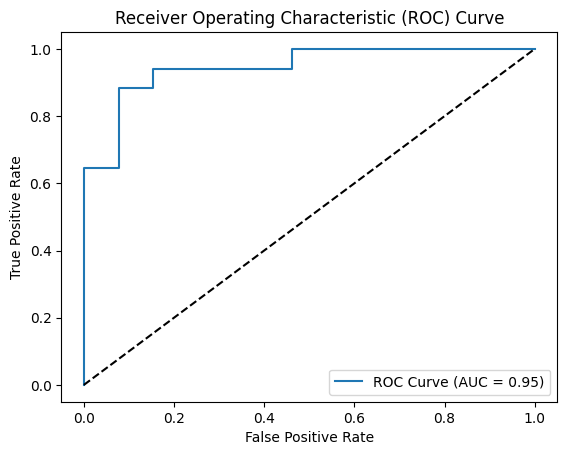

In [49]:
# Make predictions on the test set
y_pred_proba = rf.predict_proba(X_test)[:, 1]

# Calculate the FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [50]:
GNB_params = {'var_smoothing': 1e-12}

gnb = GaussianNB(**GNB_params)
gnb.fit(X_train, y_train)

GaussianNB(var_smoothing=1e-12)

In [51]:
xgb_params = {'subsample': 0.5, 
              'scale_pos_weight': 5, 
              'reg_lambda': 0.0001, 
              'reg_alpha': 0.01, 
              'n_estimators': 50, 
              'min_child_weight': 1, 
              'max_depth': 3, 
              'learning_rate': 0.3, 
              'gamma': 1.0, 
              'colsample_bytree': 0.5}

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

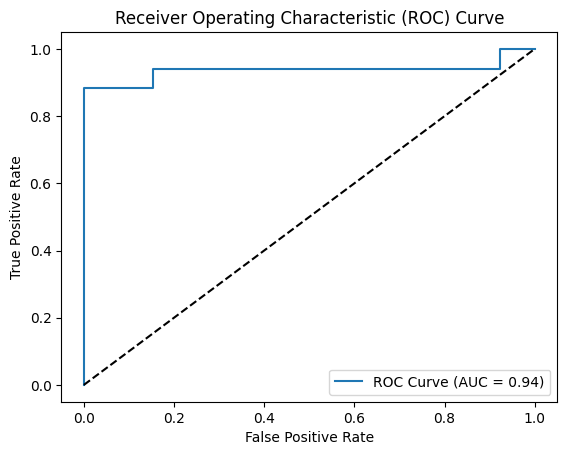

In [52]:
# Make predictions on the test set
y_pred_proba = xgb.predict_proba(X_test)[:, 1]

# Calculate the FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [53]:
thresholds

array([1.9966426 , 0.9966426 , 0.78909755, 0.75109977, 0.744074  ,
       0.37629533, 0.24021037, 0.00422158, 0.0041009 , 0.00273262],
      dtype=float32)

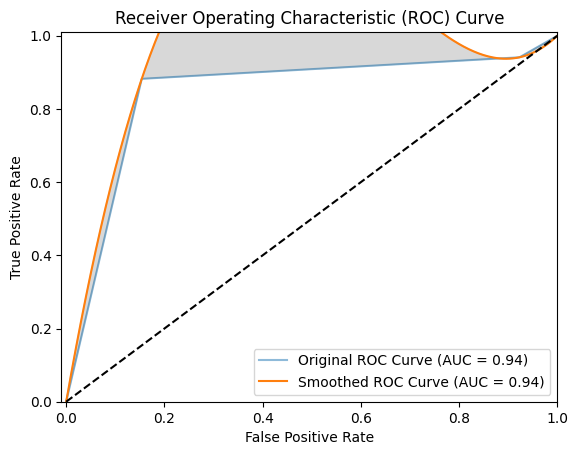

In [54]:
import numpy as np
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred_proba = xgb.predict_proba(X_test)[:, 1]

# Calculate the FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Remove duplicate values in fpr, tpr, and thresholds
unique_fpr_idx = np.unique(fpr, return_index=True)[1]
fpr_unique = fpr[unique_fpr_idx]
tpr_unique = tpr[unique_fpr_idx]

# Smooth the TPR
xnew = np.linspace(fpr_unique.min(), fpr_unique.max(), 300)
spl = make_interp_spline(fpr_unique, tpr_unique, k=3)  # k=3 for cubic smoothing
tpr_smooth = spl(xnew)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the original TPR
plt.plot(fpr_unique, tpr_unique, label='Original ROC Curve (AUC = %0.2f)' % auc_score, alpha=0.5)

# Plot the smoothed TPR
plt.plot(xnew, tpr_smooth, label='Smoothed ROC Curve (AUC = %0.2f)' % auc_score)

# Plot the shaded region between the original and smoothed curves
plt.fill_between(xnew, np.interp(xnew, fpr_unique, tpr_unique), tpr_smooth, color='gray', alpha=0.3)

# Plot settings
plt.xlim(-0.01, 1.0)
plt.ylim(0, 1.01)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

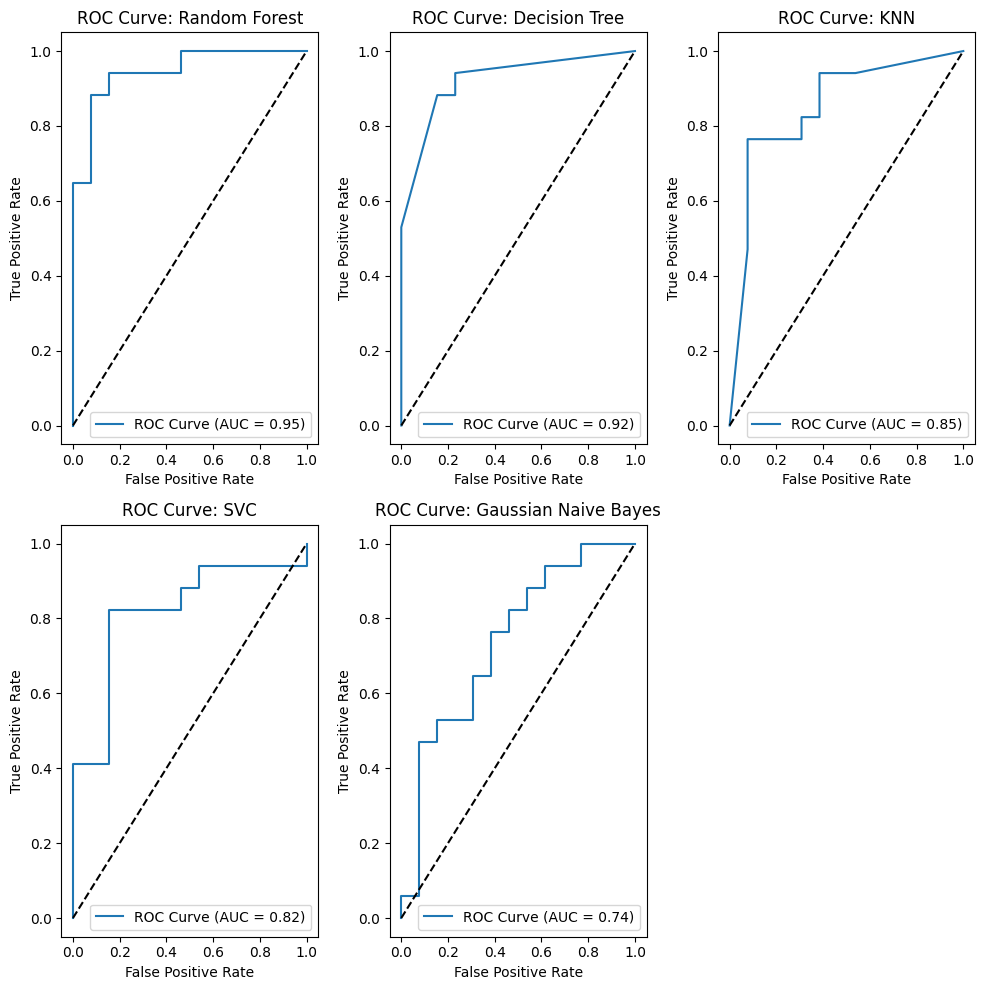

In [55]:
# Create a dictionary of classifiers and their names
classifiers = {
    'Random Forest': rf,
    'Decision Tree': dt,
    'KNN': knn,
    'SVC': svc,
    'Gaussian Naive Bayes': gnb,
    'xgboost':xgb
}

# Create a 3x2 subplot
fig, axes = plt.subplots(2, 3, figsize=(10, 10))

for (name, classifier), ax in zip(classifiers.items(), axes.ravel()[:-1]):
    # Make predictions on the test set
    y_pred_proba = classifier.predict_proba(X_test)[:, 1]

    # Calculate the FPR, TPR, and thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

    # Calculate the AUC score
    auc_score = roc_auc_score(y_test, y_pred_proba)

    # Plot the ROC curve
    ax.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc_score)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC Curve: {name}')
    ax.legend(loc="lower right")

# Remove the unused subplot
axes.ravel()[-1].axis('off')

plt.tight_layout()
plt.show()

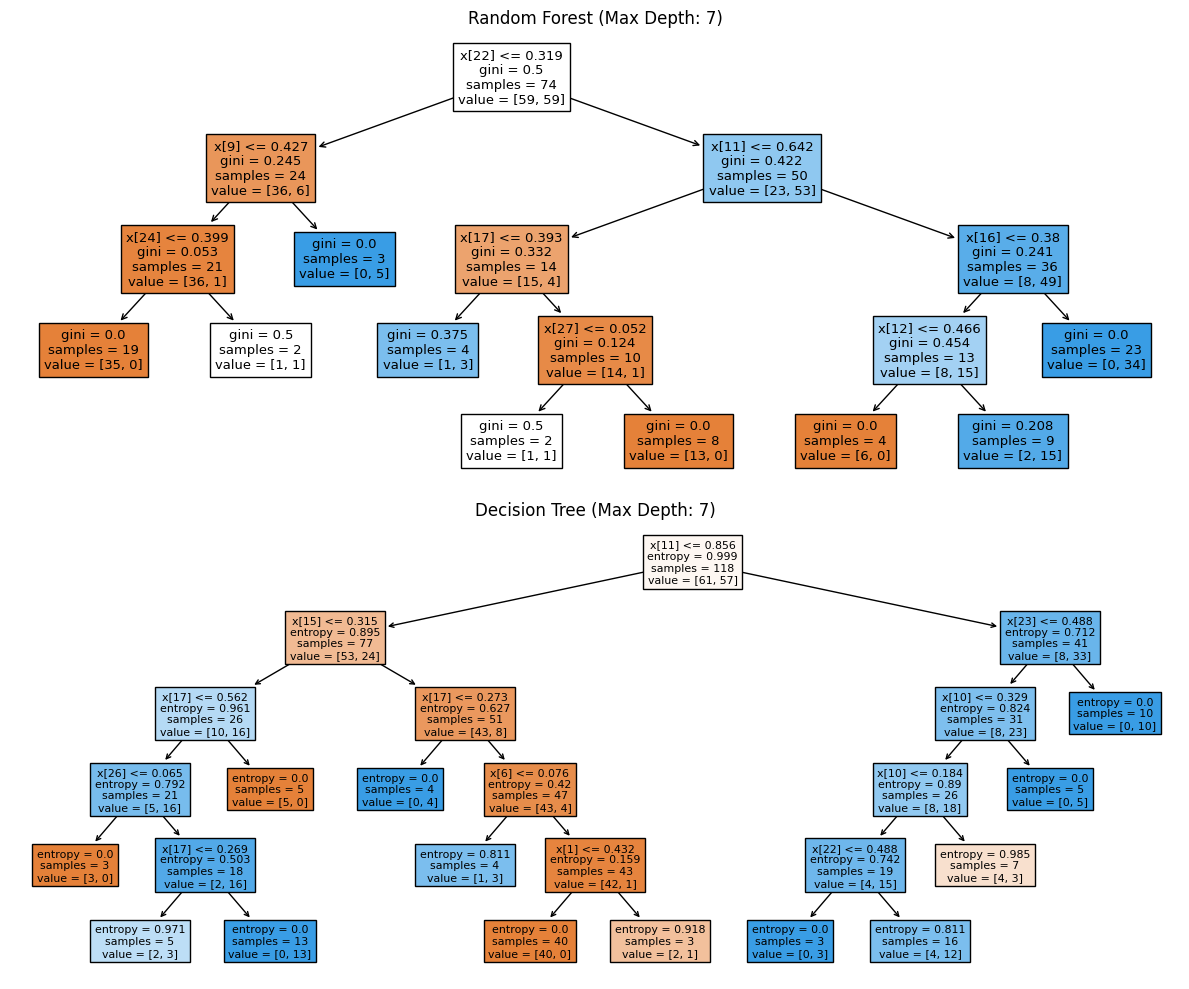

In [56]:
from sklearn.tree import plot_tree

# Create a dictionary of tree-based classifiers and their names
tree_classifiers = {
    'Random Forest': rf,
    'Decision Tree': dt
}

# Set the maximum depth for visualizing the trees
max_depth = 7

# Create a 2x1 subplot
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

for (name, classifier), ax in zip(tree_classifiers.items(), axes.ravel()):
    if name == 'Random Forest':
        # Visualize the first tree of the Random Forest
        plot_tree(classifier.estimators_[0], max_depth=max_depth, filled=True, ax=ax)
    else:
        # Visualize the Decision Tree
        plot_tree(classifier, max_depth=max_depth, filled=True, ax=ax)
    ax.set_title(f'{name} (Max Depth: {max_depth})')

plt.tight_layout()
plt.show()

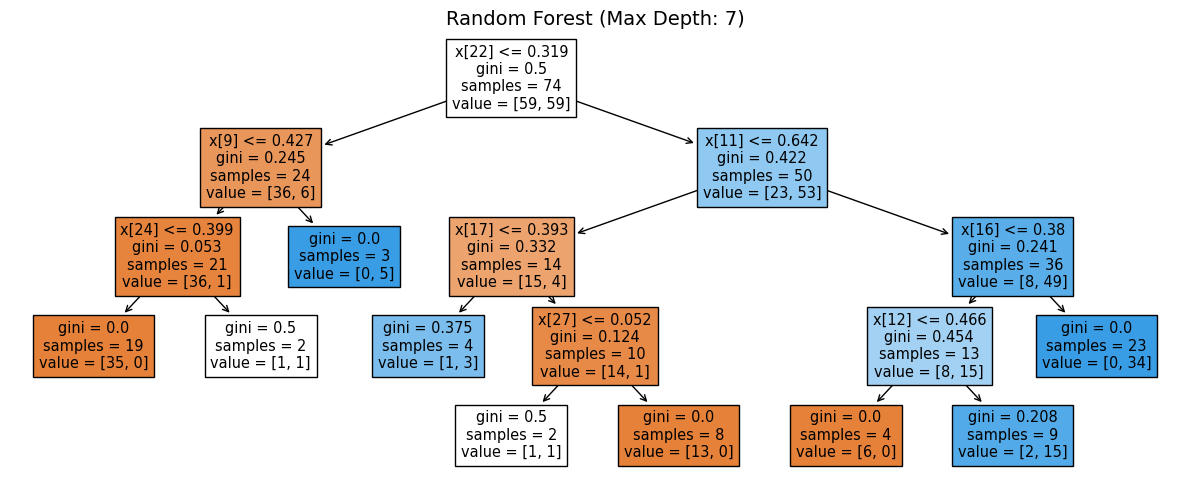

In [57]:
# Set the maximum depth for visualizing the trees
max_depth = 7

# Visualize the first tree of the Random Forest
plt.figure(figsize=(12, 5))
plot_tree(rf.estimators_[0], max_depth=max_depth, filled=True)
plt.title(f'Random Forest (Max Depth: {max_depth})', fontsize=14)
plt.tight_layout()
plt.show()